In [1]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as pyplt
import dateutil.parser
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("2013_movies.csv")
df.ReleaseDate = df.ReleaseDate.apply(lambda x: dateutil.parser.parse(x))
df.DomesticTotalGross = df.DomesticTotalGross.astype(float)
df.Runtime = df.Runtime.astype(float)
df.Budget = df.Budget.astype(float)

In [3]:
df.head(5)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047.0,Francis Lawrence,PG-13,146.0,2013-11-22
1,Iron Man 3,200000000.0,409013994.0,Shane Black,PG-13,129.0,2013-05-03
2,Frozen,150000000.0,400738009.0,Chris BuckJennifer Lee,PG,108.0,2013-11-22
3,Despicable Me 2,76000000.0,368061265.0,Pierre CoffinChris Renaud,PG,98.0,2013-07-03
4,Man of Steel,225000000.0,291045518.0,Zack Snyder,PG-13,143.0,2013-06-14


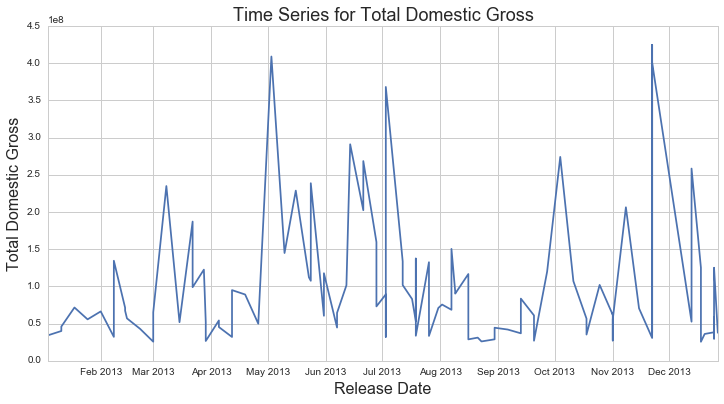

In [24]:
#Challenge 1

pyplt.figure(figsize = (12,6))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

sort_index = df.ReleaseDate.argsort()
xplot = df.ReleaseDate.sort_values()
yplot = df.DomesticTotalGross[sort_index]

pyplt.plot(xplot,yplot)
pyplt.xlabel('Release Date', fontsize = 16)
pyplt.ylabel('Total Domestic Gross', fontsize = 16)
pyplt.title('Time Series for Total Domestic Gross', fontsize=18)




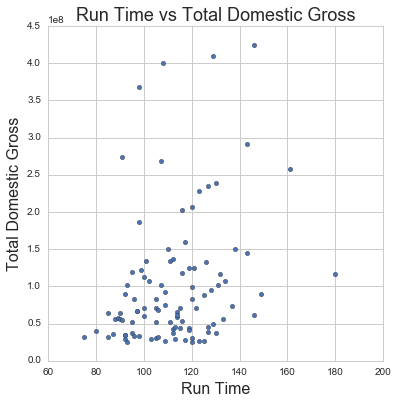

In [25]:
#Challenge 2

pyplt.figure(figsize=(6, 6))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

xplot = df.Runtime.sort_values()
yplot = df.DomesticTotalGross[df.Runtime.argsort()]

pyplt.scatter(xplot, yplot)
pyplt.xlabel('Run Time', fontsize = 16)
pyplt.ylabel('Total Domestic Gross', fontsize = 16)
pyplt.title('Run Time vs Total Domestic Gross', fontsize = 18)




In [26]:
#Challenge 3

df.groupby('Rating').mean()

,Budget,DomesticTotalGross,Runtime
Rating,,,
G,NaN,2.684928e+08,107.000000
PG,9.393333e+07,1.311357e+08,99.933333
PG-13,9.660976e+07,1.114498e+08,117.510638
R,3.886364e+07,6.989243e+07,110.729730


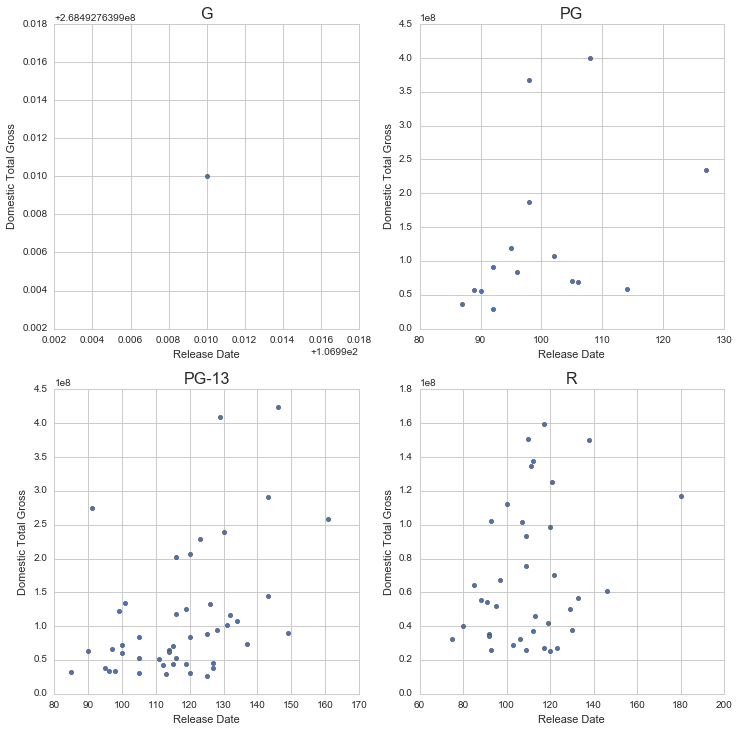

In [27]:
#Challenge 4

pyplt.figure(figsize=(12,12))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

ratings = ['G','PG','PG-13','R']

counter = 1

for r in ratings:
    
    pyplt.subplot(2, 2, counter)
    
    xplot = df.Runtime[df.Rating == r]
    yplot = df.DomesticTotalGross[df.Rating == r]
    pyplt.scatter(xplot, yplot) 
    
    pyplt.xlabel('Release Date')
    pyplt.ylabel('Domestic Total Gross')
    pyplt.title(r, fontsize = 16)
    
    counter = counter + 1
    
    

In [28]:
#Challenge 5

D_Total_Gross = df.groupby('Director').DomesticTotalGross.sum()
top_director = df.groupby('Director').DomesticTotalGross.sum()/df.Director.value_counts()
top_director.argmax(axis = 1)



'Francis Lawrence'

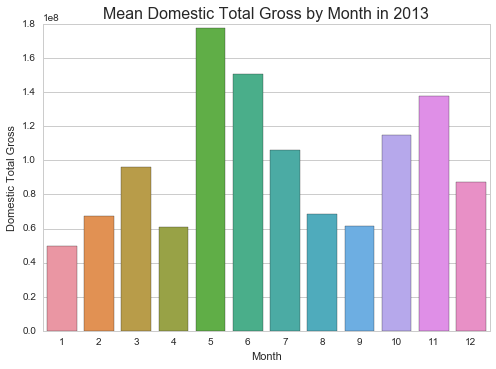

In [66]:
#Challenge 6

res = df.groupby(lambda x: df.ReleaseDate[x].month).mean()

sns.set(context="notebook", style = 'whitegrid', color_codes=True)
xplot = list(res.index)
yplot = res.DomesticTotalGross.values
ax = sns.barplot(x=xplot, y=yplot)
    
pyplt.xlabel('Month')
pyplt.ylabel('Domestic Total Gross')
pyplt.title('Mean Domestic Total Gross by Month in 2013', fontsize = 16)